<a href="https://colab.research.google.com/github/anhle/AI_Hub/blob/master/tutorial/Lab_1_Loading_and_Understanding_Your_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2017 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#Lab 1: Loading and Understanding Your Data


**Learning Objectives:**
* Learn the basics of reading data with Pandas
* Learn the basics of data cleaning and handling missing data using Pandas
* Learning how to visualize data with a scatter plot
* Use Numpy to generate the line minimizing squared loss
* Explore visually the difference in the model when replacing missing items by 0s versus the mean value for that feature.



## Data Set
This lab will use a data set from 1985 Ward's Automotive Yearbook that is part of the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets) under [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile).  You can find a description of the data at [https://archive.ics.uci.edu/ml/datasets/automobile](https://archive.ics.uci.edu/ml/datasets/automobile). 

## Imports
In this first cell, we'll import some libraries, including Pandas that will be used later to read and load the data. Run this cell to execute the code.

In [ ]:
!pip show tensorflow

# For a specific version:
!pip install tensorflow==1.2

In [ ]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
import tensorflow as tf
from tensorflow.contrib.learn.python.learn import learn_io, estimator

# This line incrasing the amount of logging when there is an error.  You can
# remove it if you want less logging
tf.logging.set_verbosity(tf.logging.ERROR)

print "Done with the imports."

## Pandas -- Python Data Analysis Library

We are using a package called [Pandas](http://pandas.pydata.org/) for reading in our data, exploring our data and doing some basic processing.  First 
we set up some options to control how items are displayed and the maximum number of rows to show when displaying a table.  Feel free to change this setup to whatever you'd like.

As illustrated below, in colab you can define code cells that do not generate any output. In fact, the first cell would also have been that way except for the `print` statement at the end added just to help illustrate this aspect of colab. If at any point you are not sure if a cell is successfully running, you can add a print statement, but that should not be necessary since you can visually see when the cell is done running when the arrow is showing again. Also note that when you select the next cell the number showing the execution order of the cell appears.

In [2]:
# Set the output display to have one digit for decimal places, for display
# readability only and limit it to printing 15 rows.
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 15

### Loading the Data Set with Pandas
The car data set we will be using in this lab is provided as a comma separated file without a header row.  In order, for each column to have a meaningful header name we must provide it.  We get the information about the columns from [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile)


In [3]:
# Provide the names for the columns since the CSV file with the data does
# not have a header row.
cols = ['symboling', 'losses', 'make', 'fuel-type', 'aspiration', 'num-doors',
        'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
        'length', 'width', 'height', 'weight', 'engine-type', 'num-cylinders',
        'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


# Load in the data from a CSV file that is comma seperated.
car_data = pd.read_csv('https://storage.googleapis.com/ml_universities/cars_dataset/cars_data.csv',
                        sep=',', names=cols, header=None, encoding='latin-1')

print "Data set loaded."

Data set loaded.


### Examine the Data

It's a good idea to get to know your data a little bit before you work with it. Let's look at the header row and the first 10 rows of data.


In [7]:
car_data.head()

,symboling,losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450


### Look at Some Basic Statistics About the Data
We'll print out a quick summary of a few useful statistics on each column. This will include things like mean, standard deviation, max, min, and various quantiles.

In [6]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.00,0.83,1.25,-2.00,0.00,1.00,2.00,3.00
wheel-base,205.00,98.76,6.02,86.60,94.50,97.00,102.40,120.90
length,205.00,174.05,12.34,141.10,166.30,173.20,183.10,208.10
width,205.00,65.91,2.15,60.30,64.10,65.50,66.90,72.30
height,205.00,53.72,2.44,47.80,52.00,54.10,55.50,59.80
weight,205.00,2555.57,520.68,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.00,126.91,41.64,61.00,97.00,120.00,141.00,326.00
compression-ratio,205.00,10.14,3.97,7.00,8.60,9.00,9.40,23.00
city-mpg,205.00,25.22,6.54,13.00,19.00,24.00,30.00,49.00
highway-mpg,205.00,30.75,6.89,16.00,25.00,30.00,34.00,54.00


### Handling Missing Data Entries
Why are some columns such as the price and losses not showing in the summary column?  If we look at the data more carefuly, we'll see that a "?" was used in this data set to indicate that a value is unknown.

Pandas provices a method [to_numeric](http://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.to_numeric.html) that converts a column to be numeric. There are three options about how to handle errors (entries that are not numeric) of which 'coerce' is what we want to use in this situation, since it converts those entries to pandas representation `NaN` for "not a number".

Notice now when you use `describe` to see the statistics for the entries that are a number, the count indicates how many entries had a number (not `NaN`) for that column.

In [9]:
car_data.dtypes

symboling              int64
losses                object
make                  object
fuel-type             object
aspiration            object
num-doors             object
body-style            object
                      ...   
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
Length: 26, dtype: object

In [13]:
car_data['price'] = pd.to_numeric(car_data['price'], errors='coerce')
car_data['horsepower'] = pd.to_numeric(car_data['horsepower'], errors='coerce')
car_data['peak-rpm'] = pd.to_numeric(car_data['peak-rpm'], errors='coerce')
car_data['city-mpg'] = pd.to_numeric(car_data['city-mpg'], errors='coerce')
car_data['highway-mpg'] = pd.to_numeric(car_data['highway-mpg'], errors='coerce')
car_data['losses'] = pd.to_numeric(car_data['losses'], errors='coerce')
car_data.head()

,symboling,losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,nan,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111.00,5000.00,21,27,13495.00
1,3,nan,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111.00,5000.00,21,27,16500.00
2,1,nan,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154.00,5000.00,19,26,16500.00
3,2,164.00,audi,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102.00,5500.00,24,30,13950.00
4,2,164.00,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115.00,5500.00,18,22,17450.00


### Replacing NAN by zero
When training a linear model using features that is numerical, we **cannot have `NaN` (doing so would cause overflow when training)**. Here we replace `NaN` (which corresponding to where we had missing entries) by 0.

In [14]:
# Replace nan by the mean storing the solution in the same table (`inplace')
car_data.fillna(0, inplace=True)
car_data.describe()

,symboling,losses,wheel-base,length,width,height,weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,97.60,98.76,174.05,65.91,53.72,2555.57,126.91,10.14,103.24,5075.37,25.22,30.75,12949.43
std,1.25,58.28,6.02,12.34,2.15,2.44,520.68,41.64,3.97,40.83,694.65,6.54,6.89,8079.04
min,-2.00,0.00,86.60,141.10,60.30,47.80,1488.00,61.00,7.00,0.00,0.00,13.00,16.00,0.00
25%,0.00,77.00,94.50,166.30,64.10,52.00,2145.00,97.00,8.60,70.00,4800.00,19.00,25.00,7689.00
50%,1.00,103.00,97.00,173.20,65.50,54.10,2414.00,120.00,9.00,95.00,5200.00,24.00,30.00,10198.00
75%,2.00,137.00,102.40,183.10,66.90,55.50,2935.00,141.00,9.40,116.00,5500.00,30.00,34.00,16500.00
max,3.00,256.00,120.90,208.10,72.30,59.80,4066.00,326.00,23.00,288.00,6600.00,49.00,54.00,45400.00


### Using a Scatter Plot to Visualize the Data

We will begin by trying to predict the price using the horsepower.  Because we just have a single feature we can visualize the raw data using a scatter plot.

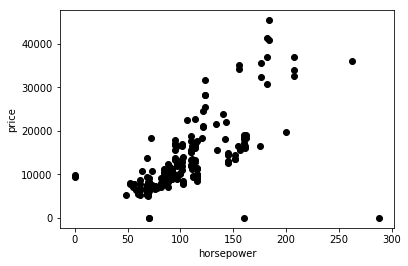

In [15]:
INPUT_FEATURE = "horsepower"
LABEL = "price"

plt.ylabel(LABEL)
plt.xlabel(INPUT_FEATURE)
plt.scatter(car_data[INPUT_FEATURE], car_data[LABEL], c='black')
plt.show()

###Using numpy polyfit to find the line that minimizes RMSE
For the task of finding a line that minimizes the squared error with respect to a set of points, using SGD is not the most efficient method but it will be useful in that it can be applied to much more complex problems.  As a tool to help see what the optimal solution looks like we wil use `polyfit` to compute the optimal solution and then add that to our plot.

In [16]:
x = car_data[INPUT_FEATURE]
y = car_data[LABEL]
opt = np.polyfit(x, y, 1)
y_pred = opt[0] * x + opt[1]
opt_rmse = math.sqrt(metrics.mean_squared_error(y_pred, y))
slope = opt[0]
bias = opt[1]
print "Optimal RMSE =", opt_rmse, "for solution", opt

Optimal RMSE = 5823.49486942 for solution [  136.77704681 -1171.29960347]


### Showing A Linear Regression Model in a Scatter Plot
To help provide intuition to what is being learned by a linear regression model and as a way to visualzize the quality, we provide a method to create the scatter plot of a single input feature with respect to the label feature.  In addition, a set of lines (from different linear regression models) as provided as a list of slopes, biases and model_names for the legend can be provided.

In [17]:
def make_scatter_plot(dataframe, input_feature, target,
                      slopes=[], biases=[], model_names=[]):
  """ Creates a scatter plot of input_feature vs target along with the models.
  
  Args:
    dataframe: the dataframe to visualize
    input_feature: the input feature to be used for the x-axis
    target: the target to be used for the y-axis
    slopes: list of model weight (slope) 
    bias: list of model bias (same size as slopes)
    model_names: list of model_names to use for legend (same size as slopes)
  """      
  # Define some colors to use that go from blue towards red
  colors = [cm.coolwarm(x) for x in np.linspace(0, 1, len(slopes))]
  
  # Generate the Scatter plot
  x = dataframe[input_feature]
  y = dataframe[target]
  plt.ylabel(target)
  plt.xlabel(input_feature)
  plt.scatter(x, y, color='black', label="")

  # Add the lines corresponding to the provided models
  for i in range (0, len(slopes)):
    y_0 = slopes[i] * x.min() + biases[i]
    y_1 = slopes[i] * x.max() + biases[i]
    plt.plot([x.min(), x.max()], [y_0, y_1],
             label=model_names[i], color=colors[i])
  if (len(model_names) > 0):
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

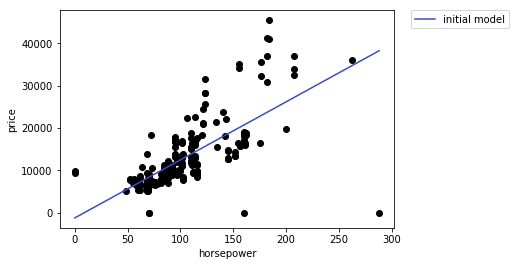

In [18]:
make_scatter_plot(car_data,INPUT_FEATURE, LABEL,
                  [slope], [bias], ["initial model"])


## Task 1: Create a scatter plot for new features (1 Point)

Create a scatter plot with price as the input feature and losses as the label where the line optimizing the squared loss is shown.  We've gotten you started.  You just need to copy the appropriate lines from above.  **Save the slope and bias from this line to be used in a later task.**

In [ ]:
INPUT_FEATURE = "price"
LABEL = "losses"

# Fill in the rest of this block.

## Task 2: Explain what you see (1 point)

Explain why we are seeing so many points along the line `y=0`.

----------------------------

**PUT YOUR ANSWER HERE**

##Task 3: Options to handle missing data (3 Points)

In this task you will explore alternate ways to handle missing data. When training a linear model using features that are numerical, we **cannot have `NaN` (doing so would cause overflow when training)**. One option is to just discard any rows with any missing entries but often this would not leave enough data.  Here we explore ways to handle the missing data without just discarding it.

Note that when you get a column of a dataframe (e.g. car_data["price']), you get a `Series`.  Read [http://pandas.pydata.org/pandas-docs/version/0.18.1/api.html#computations-descriptive-stats](http://pandas.pydata.org/pandas-docs/version/0.18.1/api.html#computations-descriptive-stats) and think about if you see any statistics for a column that might make a better choice than 0 for filling in the missing entries.What do you think would work best?

Modify the code to use the function you selected to replace missings instead of just using 0 and both look at the scatter plot and the line minimizing RMSE both with the missings replaced by 0 and the missing entries replaced by the option you pick.  Feel free to show multiple options as a tool to help you explain your choice of which you think is best..  What option do you think is best and why?


In [ ]:
# Load in the data from a CSV file that is comma seperated.
car_data_v2 = pd.read_csv('https://storage.googleapis.com/ml_universities/cars_dataset/cars_data.csv',
                           sep=',', names=cols, header=None, encoding='latin-1')
car_data_v2['price'] = pd.to_numeric(car_data_v2['price'], errors='coerce')
car_data_v2['losses'] = pd.to_numeric(car_data_v2['losses'], errors='coerce')

In [ ]:
# Fill in what you want to do with the nan here

In [ ]:
# Create a scatter plot with the model from above (when NA replaced by 0) and at least one other option.

-----------------

**Put your answer here to what option you think is best and why here**